Stochastic (Gillespie) version of SEIR model, test mean against deterministic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(".")
import simple_SEIR_package as detsim
import Gillespie_package_SEIR as stochsim

Case 1: No external FOI, just study system in isolation
Approximate final distribution of Rd, Rl, Ro for single infection in L

In [2]:
ip = 0
NP = 5000
Nsim = 1000
alphaT = 0.001
alphaC = 0.001
sigma = 1/5
gamma = 1/3
FOI = 0.0
n=np.array([100,100,100])
s=np.array([100,95,100])
e = n-s
i = np.zeros(3,dtype=np.int)
ntot = np.sum(n)

In [3]:
td = 0.2
beta = 0.3
S,E,I,R = detsim.SIRsim(beta,td,sigma,gamma,FOI,n[0]/np.sum(n),n[1]/np.sum(n),n[2]/np.sum(n),\
                                alphaT,alphaC,1/ntot,0.1,1000)
t,sim = stochsim.run_gillespie(n,s,e,i,NP,ip,beta,td,alphaT,alphaC,sigma,gamma,FOI,tend=100)

In [4]:
full_states = np.zeros((5,5,1000),dtype=np.object)
det_states = np.zeros((5,5),dtype=np.object)
times = np.zeros((5,5,1000),dtype=np.object)
for j in np.arange(5):
    td = 0.05*(j+1)
    for k in np.arange(5):
        beta = (k+1)*0.5
        S,E,I,R = detsim.SIRsim(beta,td,sigma,gamma,FOI,n[0]/ntot,n[1]/ntot,n[2]/ntot,\
                                alphaT,alphaC,5/ntot,0.1,1000)
        det_states[k,j] = [S,E,I,R]
        for p in np.arange(Nsim):
            t,sim = stochsim.run_gillespie(n,s,e,i,NP,ip,beta,td,alphaT,alphaC,sigma,gamma,FOI,5000)
            full_states[k,j,p] = sim
            times[k,j,p] = t

In [5]:
n=np.array([100,100,100])
s=np.array([100,95,100])
e = n-s
i = np.zeros(3,dtype=np.int)
interpolation = np.zeros((5,5,Nsim,10,1001))
grid_t = np.arange(1001)*0.1
for j in np.arange(5):
    for k in np.arange(5):
        for p in np.arange(Nsim):
            tlast = times[k,j,p][0]
            for th in np.arange(1,len(times[k,j,p])):
                tnow = times[k,j,p][th]
                in_range = (grid_t >= tlast)*(grid_t < tnow)
                if np.any(in_range):
                    for vt in np.arange(10):
                        interpolation[k,j,p,vt,in_range] = full_states[k,j,p][vt,th-1]
                tlast = tnow
            in_range = (grid_t >= tlast)
            for vt in np.arange(10):
                interpolation[k,j,p,vt,in_range] = full_states[k,j,p][vt,-1]

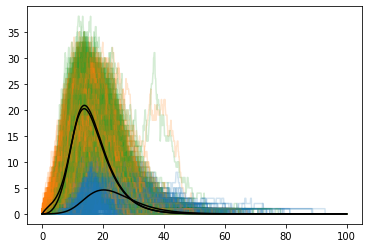

In [6]:
k=4
j=0
for p in np.arange(Nsim):
    plt.plot(np.arange(1001)*0.1,interpolation[k,j,p,6,:],c='C0',alpha=0.2)
    plt.plot(np.arange(1001)*0.1,interpolation[k,j,p,7,:],c='C1',alpha=0.2)
    plt.plot(np.arange(1001)*0.1,interpolation[k,j,p,8,:],c='C2',alpha=0.2)

plt.plot(np.arange(1001)*0.1,det_states[k,j][2][0,:]*ntot,c='k')
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][1,:]*ntot,c='k')
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][2,:]*ntot,c='k')

In [7]:
mean_sims = np.mean(interpolation,axis=2)
print(mean_sims.shape)

(5, 5, 10, 1001)


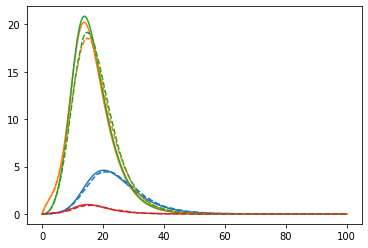

In [8]:
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][0,:]*ntot,c='C0')
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][1,:]*ntot,c='C1')
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][2,:]*ntot,c='C2')
plt.plot(np.arange(1001)*0.1,det_states[k,j][2][3,:]*NP,c='C3')

plt.plot(np.arange(1001)*0.1,mean_sims[k,j,6,:],'--',c='C0')
plt.plot(np.arange(1001)*0.1,mean_sims[k,j,7,:],'--',c='C1')
plt.plot(np.arange(1001)*0.1,mean_sims[k,j,8,:],'--',c='C2')
plt.plot(np.arange(1001)*0.1,mean_sims[k,j,9,:],'--',c='C3')

Now consider the case where external FOI exists. Need an update of the Gillespie algorithm

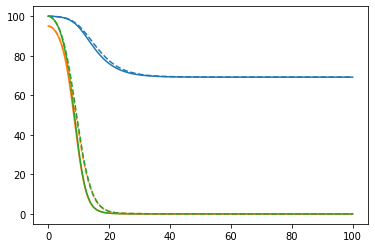

In [9]:
plt.plot(np.arange(1001)*0.1,det_states[k,j][0][0,:]*ntot,c='C0')
plt.plot(np.arange(1001)*0.1,det_states[k,j][0][1,:]*ntot,c='C1')
plt.plot(np.arange(1001)*0.1,det_states[k,j][0][2,:]*ntot,c='C2')

plt.plot(np.arange(1001)*0.1,mean_sims[k,j,0,:],'--',c='C0')
plt.plot(np.arange(1001)*0.1,mean_sims[k,j,1,:],'--',c='C1')
plt.plot(np.arange(1001)*0.1,mean_sims[k,j,2,:],'--',c='C2')

In [10]:
n=np.array([50,15,10])
s=np.array([40,10,5])
e =np.array([0,0,0])
i = n-s
print(stochsim.list_event_probs(n,s,e,i,NP,ip,beta,td,alphaT,alphaC,sigma,gamma,FOI))
print(stochsim.generate_dt_and_event(n,s,e,i,NP,ip,beta,td,alphaT,alphaC,sigma,gamma,FOI))

[8.33333333 8.33333333 4.16666667 0.         0.         0.
 3.33333333 1.66666667 1.66666667 1.66666667 0.        ]
(0.04936542991641593, 0)
